## <center> Hyperspectral Vegetation Mapping 🏡</center>  
#### <center> *Jules de Schuttelaere* </center> 

In [36]:
from spectral import *
import numpy as np
from matplotlib import pyplot as plt
import skimage

### Load Hyperspectral image 📸

In [2]:
hyperim = np.load("august2019_05_vnir_500x500.npy")

### Load header (wavelengths) 🌊

In [3]:
wavelength = envi.read_envi_header('august2019_05_vnir_500x500.hdr')['wavelength']
ww = [float(i) for i in wavelength]


In [4]:
ww

[0.40471,
 0.4079,
 0.41109,
 0.41427,
 0.41746,
 0.42065,
 0.42384,
 0.42703,
 0.43022,
 0.43341,
 0.43659,
 0.43978,
 0.44297,
 0.44616,
 0.44935,
 0.45254,
 0.45573,
 0.45892,
 0.4621,
 0.46529,
 0.46848,
 0.47167,
 0.47486,
 0.47805,
 0.48124,
 0.48443,
 0.48761,
 0.4908,
 0.49399,
 0.49718,
 0.50037,
 0.50356,
 0.50675,
 0.50994,
 0.51312,
 0.51631,
 0.5195,
 0.52269,
 0.52588,
 0.52907,
 0.53226,
 0.53544,
 0.53863,
 0.54182,
 0.54501,
 0.5482,
 0.55139,
 0.55458,
 0.55777,
 0.56095,
 0.56414,
 0.56733,
 0.57052,
 0.57371,
 0.5769,
 0.58009,
 0.58328,
 0.58646,
 0.58965,
 0.59284,
 0.59603,
 0.59922,
 0.60241,
 0.60559,
 0.60878,
 0.61197,
 0.61516,
 0.61835,
 0.62154,
 0.62473,
 0.62792,
 0.63111,
 0.63429,
 0.63748,
 0.64067,
 0.64386,
 0.64705,
 0.65024,
 0.65343,
 0.65662,
 0.6598,
 0.66299,
 0.66618,
 0.66937,
 0.67256,
 0.67575,
 0.67893,
 0.68212,
 0.68531,
 0.6885,
 0.69169,
 0.69488,
 0.69807,
 0.70126,
 0.70445,
 0.70763,
 0.71082,
 0.71401,
 0.7172,
 0.72039,
 0.72358,

In [5]:
hyperim.shape

(500, 500, 186)

In [6]:
#3D cube representation (doesn't work on notebook)
# view_cube(hyperim, bands=[11,41,75])

### Creating function to retrieve closest values in a list from a given dictionary 🔍

In [7]:
def FindBands(bands,header):
    names = list(bands.keys())
    values = list(bands.values())
    bands_idx = {}
    for name in names:
        gaps_function = lambda list_value : abs(list_value - bands[name])
        closest = min(header, key=gaps_function)
        idx = header.index(closest)
        bands_idx[name] = idx
    return bands_idx

In [8]:
rgbnir = {'blue':0.44,'green':0.535,'red':0.645,'NIR':0.8}
bands_idx = FindBands(rgbnir,ww)
bands_idx

{'blue': 11, 'green': 41, 'red': 75, 'NIR': 124}

### Plotting RGB Image 📊

ImageView object:
  Display bands       :  [11, 41, 75]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0017000000225380063, 0.06639999896287918]
    G: [0.004800000227987766, 0.07940000295639038]
    B: [0.002899999963119626, 0.1388999968767166]

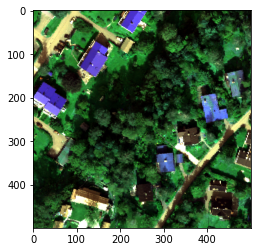

In [9]:
imshow(hyperim,list(bands_idx.values())[:3], stretch = ((0.02,0.98),(0.02,0.98),(0.02,0.98)))

In [10]:
save_rgb('hyper_rgb.jpg', hyperim,list(bands_idx.values())[:3],stretch = ((0.02,0.98),(0.02,0.98),(0.02,0.98)))

### Defining and Plotting NVDI Image 🔴

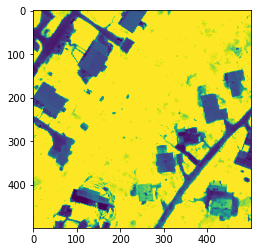

In [11]:
ndvi_ima = (hyperim[:,:,124]-hyperim[:,:,75])/(hyperim[:,:,124]+hyperim[:,:,75])
plt.imshow(ndvi_ima,vmin=0,vmax=0.8)

### Defining some known points as ground truth 📚

In [20]:
vegetation = np.array(hyperim[230,240,:])
asphalt = np.array(hyperim[55,300,:])
roof = np.array(hyperim[144,110,:])

### Ploting spectra for those points 📈

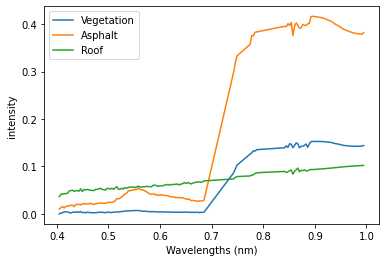

In [34]:

z = np.array(hyperim[230,240,:].reshape(-1,1))
z2 = np.array(hyperim[55,300,:].reshape(-1,1))
z3 = np.array(hyperim[144,110,:].reshape(-1,1))
plt.figure()
plt.plot(ww,z, label = "Vegetation")
plt.plot(ww,z2)
plt.plot(ww,z3)

plt.legend(["Vegetation","Asphalt","Roof"])
plt.xlabel("Wavelengths (nm)")
plt.ylabel("intensity")
plt.show()

### NDVI from spectral using the spectral package 🧪

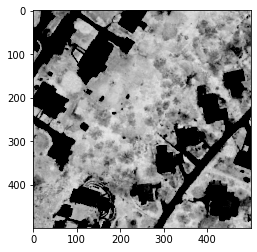

In [58]:
vi = ndvi(hyperim,75,124)
plt.figure()
#previsualising the threshold value of 0.6
plt.imshow(vi,vmin=0.6,vmax= 1, cmap = "gray")

### Performing Threshold ⚖️

In [54]:
vi_trhsld = vi < 0.6

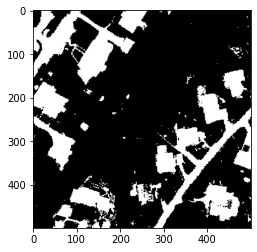

In [59]:
plt.imshow(vi_trhsld, cmap = "gray")